In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla



import pandas as pd
from scipy.sparse.csc import csc_matrix

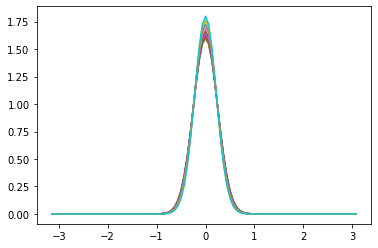

-2.522896279702135e-17


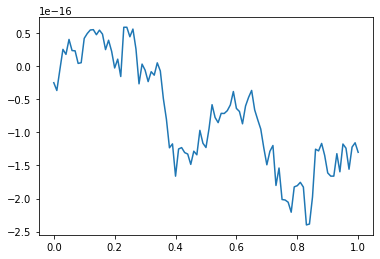

[ 0.00000000e+00+0.j -3.57476932e-18+0.j -4.89485235e-18+0.j
 -5.12541142e-18+0.j -6.50561484e-18+0.j -1.38654612e-18+0.j
 -6.95065737e-18+0.j -7.08795381e-19+0.j  4.84757439e-18+0.j
  5.69250957e-18+0.j -5.16274393e-18+0.j -9.21377614e-18+0.j
 -1.19422755e-17+0.j  1.05331488e-17+0.j  1.44143108e-17+0.j
  2.26079678e-17+0.j  2.56472259e-17+0.j  3.62035968e-17+0.j
  3.87169804e-17+0.j  3.78886145e-17+0.j  2.28764533e-17+0.j
  2.81583717e-17+0.j  3.73007120e-17+0.j  2.58720004e-17+0.j
  2.15495603e-17+0.j  3.01670613e-17+0.j  2.47818493e-17+0.j
  2.65234731e-17+0.j  1.20933373e-17+0.j  1.54966158e-17+0.j
  9.99009402e-18+0.j  1.14535313e-17+0.j  1.18679614e-17+0.j
  7.37747607e-18+0.j  2.90705222e-18+0.j  3.22398659e-18+0.j
  9.71151994e-18+0.j  1.17465976e-17+0.j  2.33692131e-17+0.j
  3.34277238e-17+0.j  3.43588764e-17+0.j  3.68773338e-17+0.j
  3.12451868e-17+0.j  3.48064881e-17+0.j  3.20735399e-17+0.j
  4.91210182e-17+0.j  4.53450349e-17+0.j  5.29131851e-17+0.j
  4.79858234e-17+0.j  5.

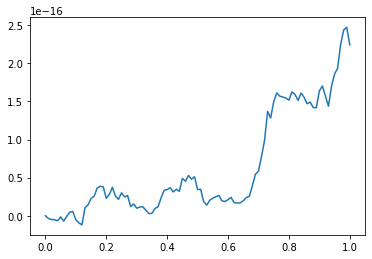

[-8.90189032e-13-3.98073104e-13j -1.17390681e-12-2.60806543e-13j
 -2.09367319e-12+3.08210660e-13j -3.85212013e-12+1.86138251e-12j
 -6.76988334e-12+5.62563745e-12j -1.12359249e-11+1.41113715e-11j
 -1.75856803e-11+3.23450655e-11j -2.58539195e-11+7.03408446e-11j
 -3.53716028e-11+1.48080172e-10j -4.43514213e-11+3.05608343e-10j
 -5.02813227e-11+6.23579814e-10j -5.40661540e-11+1.26503616e-09j
 -7.68704270e-11+2.55984525e-09j -2.14529278e-10+5.17326339e-09j
 -7.94329271e-10+1.04357733e-08j -2.79463513e-09+2.09696457e-08j
 -8.90722373e-09+4.18288297e-08j -2.61034345e-08+8.24423897e-08j
 -7.15721369e-08+1.59592154e-07j -1.85895253e-07+3.01087440e-07j
 -4.61048591e-07+5.47764641e-07j -1.09721787e-06+9.45733187e-07j
 -2.51225799e-06+1.50678242e-06j -5.54010154e-06+2.08364129e-06j
 -1.17639376e-05+2.04271341e-06j -2.40195881e-05-5.04486249e-07j
 -4.70348128e-05-1.03614495e-05j -8.79640453e-05-3.85831640e-05j
 -1.56105553e-04-1.08741913e-04j -2.60166984e-04-2.67920276e-04j
 -3.99883103e-04-6.046598

In [17]:
#Wigner/Husini function implementation
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=100
isteps=100

t0=0
theta0=0#+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

#angular momentum value, this works as long as Omeg0=1, which it does
Exp_momentum=np.zeros((nsteps+1,2),np.complex)
def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()

print(T)

print(len(theta))

100
100
(100, 100, 100)
[ 1.19422755e-17+0.j  1.17010174e-17+0.j  1.14597593e-17+0.j
  1.12185012e-17+0.j  1.09772431e-17+0.j  1.07359850e-17+0.j
  1.04947269e-17+0.j  1.02534689e-17+0.j  1.00122108e-17+0.j
  9.77095267e-18+0.j  9.52969458e-18+0.j  9.28843649e-18+0.j
  9.04717840e-18+0.j  8.80592031e-18+0.j  8.56466222e-18+0.j
  8.32340413e-18+0.j  8.08214603e-18+0.j  7.84088794e-18+0.j
  7.59962985e-18+0.j  7.35837176e-18+0.j  7.11711367e-18+0.j
  6.87585558e-18+0.j  6.63459749e-18+0.j  6.39333940e-18+0.j
  6.15208131e-18+0.j  5.91082322e-18+0.j  5.66956513e-18+0.j
  5.42830704e-18+0.j  5.18704895e-18+0.j  4.94579086e-18+0.j
  4.70453277e-18+0.j  4.46327468e-18+0.j  4.22201659e-18+0.j
  3.98075849e-18+0.j  3.73950040e-18+0.j  3.49824231e-18+0.j
  3.25698422e-18+0.j  3.01572613e-18+0.j  2.77446804e-18+0.j
  2.53320995e-18+0.j  2.29195186e-18+0.j  2.05069377e-18+0.j
  1.80943568e-18+0.j  1.56817759e-18+0.j  1.32691950e-18+0.j
  1.08566141e-18+0.j  8.44403317e-19+0.j  6.03145226e-19+0.j


/home/sophie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


[[6.28318531 5.88468107 5.48778146 ... 7.07858915 6.68168955 6.28318531]
 [5.88866084 5.4901566  5.09325699 ... 6.68406468 6.28716508 5.88866084]
 [5.49569338 5.09718914 4.70028953 ... 6.29109722 5.89419762 5.49569338]
 ...
 [7.46053683 7.06203259 6.66513299 ... 8.25594067 7.85904107 7.46053683]
 [7.07067724 6.672173   6.27527339 ... 7.86608108 7.46918148 7.07067724]
 [6.67770978 6.27920554 5.88230593 ... 7.47311362 7.07621402 6.67770978]]
(100, 100)
(100, 100)


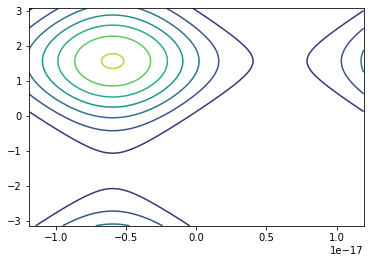

In [18]:
print(len(theta))
omega=np.linspace(-min(pbar),min(pbar),100)
theta=theta
x=np.linspace(-np.pi,np.pi,100)

print(len(theta))
#psi=CrankNicolson(T,n)

dx=1

omega1,theta1,x1=np.meshgrid(omega,theta,x)
omega2,theta2=np.meshgrid(omega,theta)
#theta3,x3=np.meshgrid(theta,x)
#print(x1,y1)
#print(x,y)

isteps=len(omega)
jsteps=len(theta)

def Husimi(omega0,theta0,z0):
    return T*np.exp((k*ntild*omega0*x)-(((theta0-x0)**2)/(4*(dx**4))))

func=f(omega1,theta1,x1)

print(func.shape)
print(omega)
print(theta)
#plt.plot(z)
#plt.show()

#plt.contour(x1,y1,z)
#plt.show()


#print(x[0])
#print(z)
print(omega.shape)
print(theta.shape)
#print(z.shape)


Int=np.zeros((isteps,jsteps))
for i in range(isteps):
    for j in range(jsteps):
        Int[i,j]=si.simps(func[i,:,j],x)#,np.pi/2,-1,'avg')
        
print(Int)
print(Int.shape)
print(omega2.shape)

plt.contour(np.real(omega2),np.real(theta2),np.abs(Int)**2)#blue
plt.show()

